
Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [3]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from plotnine import *

In [4]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Below are the two ways to make dummy variables. Notice One Hot Encoder keeps the original column and then creates new dummy variables based on the unique values in the column and appends them to the data frame. Get dummies, will create dummies from a column with unique values, then create new columns from this(however, deletes original column).

In [5]:
penguins = load_penguins()

# Create the encoder.
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit the encoder on the 'species' column.
encoder.fit(penguins[['species']])

# Transform the 'species' column.
encoded_species = encoder.transform(penguins[['species']])

# Create a DataFrame for the encoded data.
encoded_df = pd.DataFrame(encoded_species, columns=encoder.get_feature_names_out(['species']))

# Concatenate the encoded DataFrame with the original DataFrame.
penguins_encoded = pd.concat([penguins, encoded_df], axis=1)

# Print the first few rows of the encoded DataFrame.
penguins_encoded.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1.0,0.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1.0,0.0,0.0


In [6]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()

# Apply get_dummies to the 'species' column.
penguins_dummies = pd.get_dummies(penguins, columns=['species'], prefix=['species'], prefix_sep='_', dtype= int)

# Print the first few rows of the DataFrame with dummy variables.
penguins_dummies.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo
0,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,0,0
1,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1,0,0
2,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1,0,0
3,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1,0,0
4,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1,0,0


Let us also make dummy variables for the penguin's sex and home island as well.

In [7]:
penguins_dummies_2 = pd.get_dummies(penguins_dummies, columns=['sex'], prefix=['sex'], prefix_sep='_', dtype= int)
penguins_dummies_3 = pd.get_dummies(penguins_dummies_2, columns=['island'], prefix=['island'], prefix_sep='_', dtype= int)
penguins_clean = penguins_dummies_3.dropna()
penguins_clean.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,1,0,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,1,0,0,0,1
2,40.3,18.0,195.0,3250.0,2007,1,0,0,1,0,0,0,1
4,36.7,19.3,193.0,3450.0,2007,1,0,0,1,0,0,0,1
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,1,0,0,1


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [8]:
X = penguins_clean[['bill_length_mm']]
y = penguins_clean['bill_depth_mm']

In [9]:
# Simple linear regression
model_linear = LinearRegression()
model_linear.fit(X, y)

# Quadratic model
model_quadratic = Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear",LinearRegression())])
model_quadratic.fit(X, y)

# Cubic model
model_cubic = Pipeline([("poly", PolynomialFeatures(degree=3)), ("linear",LinearRegression())])
model_cubic.fit(X, y)

# Degree 10 polynomial model
model_degree10 = Pipeline([("poly", PolynomialFeatures(degree=10)), ("linear",LinearRegression())])
model_degree10.fit(X, y)
pass

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 8 rows containing missing values.


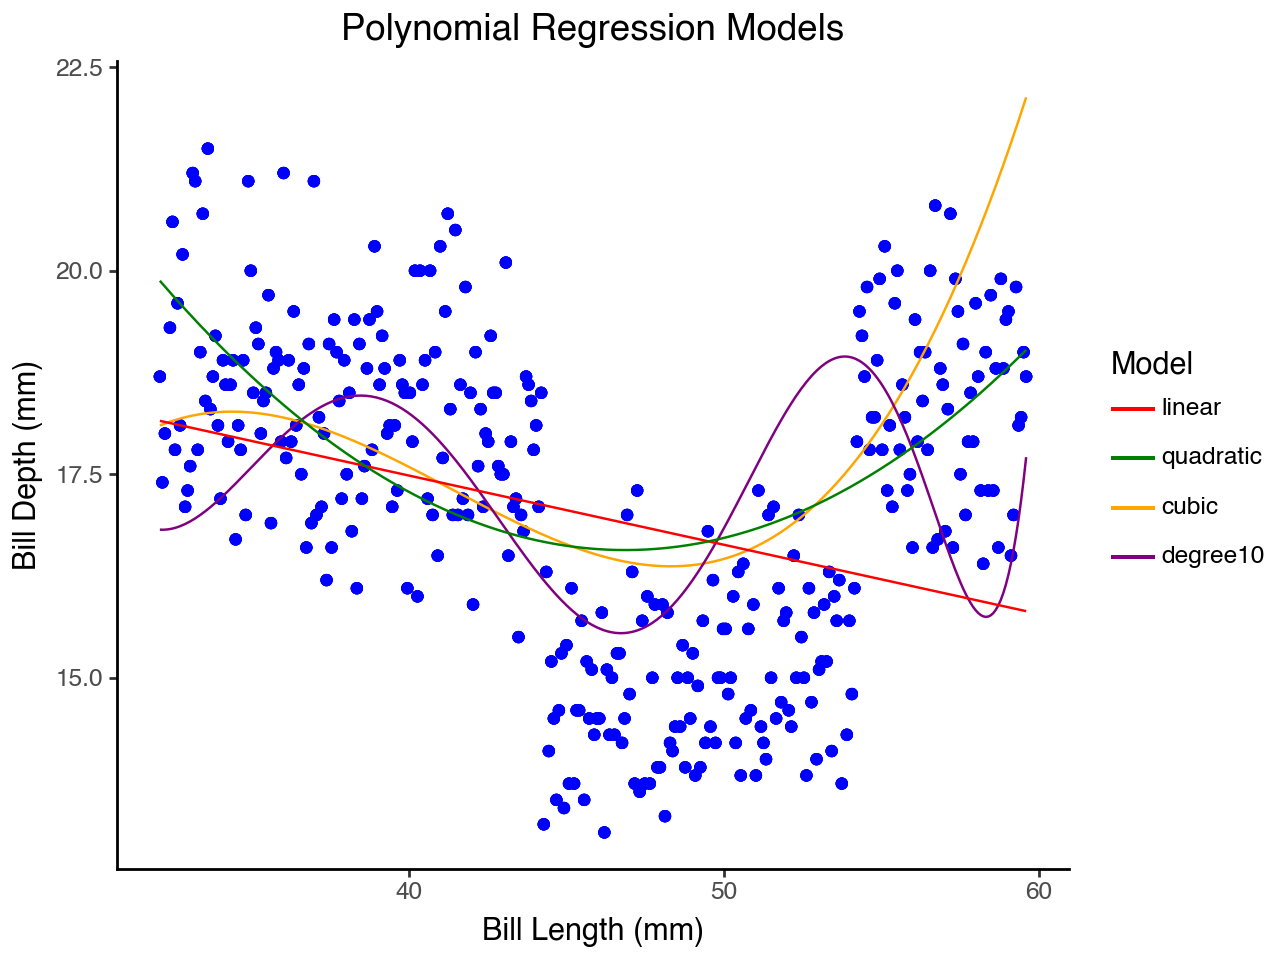

In [20]:
# Create a range of x values for plotting
x_range = pd.DataFrame({'bill_length_mm': np.linspace(X['bill_length_mm'].min(), X['bill_length_mm'].max(), 344)})

# Get predictions for each model
y_linear_pred = model_linear.predict(x_range)
y_quadratic_pred = model_quadratic.predict(x_range)
y_cubic_pred = model_cubic.predict(x_range)
y_degree10_pred = model_degree10.predict(x_range)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'bill_length_mm': x_range['bill_length_mm'],
    'bill_depth_mm': y,  # Actual values
    'linear': y_linear_pred,
    'quadratic': y_quadratic_pred,
    'cubic': y_cubic_pred,
    'degree10': y_degree10_pred
})


# Melt the DataFrame for ggplot
plot_df_melt = pd.melt(plot_df, id_vars=['bill_length_mm', 'bill_depth_mm'],
                       value_vars=['linear', 'quadratic', 'cubic', 'degree10'],
                       var_name='Model', value_name='prediction')

# Create the ggplot
(ggplot(plot_df_melt, aes(x='bill_length_mm', y='bill_depth_mm'))
 + geom_point(color='blue')  # Scatterplot of actual data
 + geom_line(aes(y='prediction', color='Model'))  # Lines for model predictions
 + labs(title='Polynomial Regression Models', x='Bill Length (mm)', y='Bill Depth (mm)')
  + scale_color_manual(values={'linear': 'red', 'quadratic': 'green', 'cubic': 'orange', 'degree10': 'purple'},
                     limits=['linear', 'quadratic', 'cubic', 'degree10'])
 + theme_classic())

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model is underfitting the data. We can tell because the line completely misses the rise in bill depth found when bill length exceeds 55 mm. Telling us the model is too simple to capture the curvature of the data.

The degree 10 model is overfitting the data. We can tell because there are big fluctuations in the model even in dense areas where there is no pattern. This shows that the model is overfitting to data that is present in the specific data, but does not match with a general data set, picking up on too much noise.

I feel the best model for this is the quadratic model because it successfully captures the edge cases of the data as well as picks up on the overall shape of the data.

Below we can see the r squared metric for all of the models and can verify the quadratic is the best model for this data.

In [19]:
print(r2_score(y, y_linear_pred[:342]))
print(r2_score(y, y_quadratic_pred[:342]))
print(r2_score(y, y_cubic_pred[:342]))
print(r2_score(y, y_degree10_pred[:342]))

0.05567012057606047
0.30752698685355717
0.23814073834349792
0.05495541539581972
